<a href="https://colab.research.google.com/github/hashmis79/SRAAssignments/blob/master/Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choose and option
1)Vertical Edge detection
2)Horizontal Edge detection
3)Sobel edge detection
4)Canny Edge Detection3
(340, 340, 3)
(344, 344, 3)
(342, 342, 3)
(342, 342, 3)


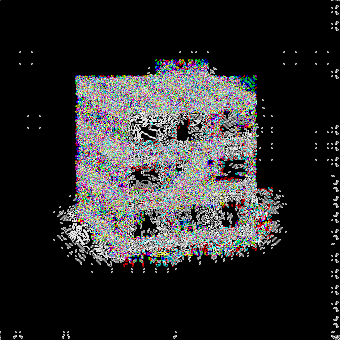

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


def rgb2gray(rgb):
  r,g,b = rgb[0],rgb[1],rgb[2]
  gray = 0.2989*r + 0.5870*g + 0.1140 * b
  return gray

def applyPadding(array,x):
  new = np.zeros((array.shape[0]+(2*x),array.shape[1]+(2*x),array.shape[2]),dtype = array.dtype)
  for s in range(array.shape[2]):
    for i in range(array.shape[0]):
      for j in range(array.shape[1]):
        new[i+int(x/2),j+int(x/2),s] = array[i,j,s]
  return new

def applyKernel(kernel,matrix):
  padded_Matrix = applyPadding(matrix,int((kernel.shape[0]-1)/2))
  print(padded_Matrix.shape)
  filtered = np.zeros((matrix.shape[0],matrix.shape[1],matrix.shape[2]),dtype = matrix.dtype)
  for s in range(matrix.shape[2]):
    for i in range(matrix.shape[0]):
      for j in range(matrix.shape[1]):
        sum = 0.0
        for y in range(kernel.shape[0]):
          for x in range(kernel.shape[1]):
            sum = sum + kernel[y,x]*padded_Matrix[i+y,j+x,s]
        filtered[i,j,s] = sum
  return filtered     
image = plt.imread('edge-detection2.jpg')
option =int(input('Choose and option\n1)Vertical Edge detection\n2)Horizontal Edge detection\n3)Sobel edge detection\n4)Canny Edge Detection'))
print(image.shape)
image1 = np.zeros((image.shape[0],image.shape[1],image.shape[2],),dtype = image.dtype)
# for i in range(image.shape[0]):
#   for j in range(image.shape[1]):
#     image1[i,j] = rgb2gray(image[i,j])
# image1 = image1*255.0
if option == 1:
  kernel_box = np.array([[(1/273),(4/273),(7/273),(4/273),(1/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(7/273),(26/273),(41/273),(26/273),(7/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(1/273),(4/273),(7/273),(4/273),(1/273)]])
  image1 = applyKernel(kernel_box,image1)  
  kernel_box = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
  filtered = applyKernel(kernel_box,image1)
elif option == 2:
  kernel_box = np.array([[(1/273),(4/273),(7/273),(4/273),(1/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(7/273),(26/273),(41/273),(26/273),(7/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(1/273),(4/273),(7/273),(4/273),(1/273)]])
  image = applyKernel(kernel_box,image)  
  kernel_box = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
  filtered = applyKernel(kernel_box,image)
  # filtered *= 255.0/filtered.max()
elif option == 3:
  kernel_box = np.array([[(1/273),(4/273),(7/273),(4/273),(1/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(7/273),(26/273),(41/273),(26/273),(7/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(1/273),(4/273),(7/273),(4/273),(1/273)]])
  image = applyKernel(kernel_box,image)
  kernel_box = np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
  vertical = applyKernel(kernel_box,image)
  kernel_box = np.array([[-3,-10,-3],[0,0,0],[3,10,3]])
  horizontal = applyKernel(kernel_box,image)
  filtered = np.sqrt(np.square(horizontal)+np.square(vertical))
  filtered *= 255.0/filtered.max()

# plt.imshow(image)
# print(filtered)
cv2_imshow(filtered)


(344, 344, 3)
Found 3 Channels : (340, 340, 3)
Converted to Gray Channel. Size : (340, 340)
Kernel Shape : (3, 3)


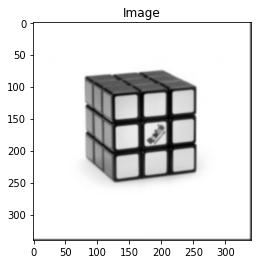

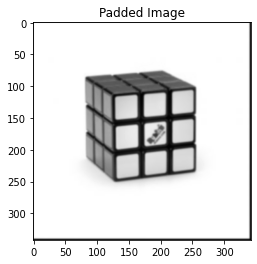

Output Image size : (340, 340)


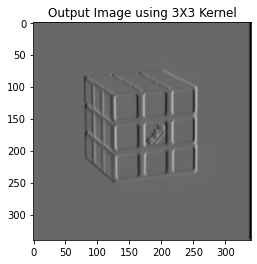

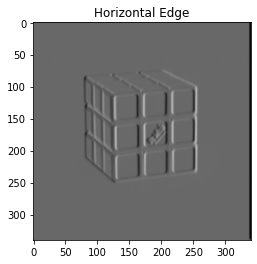

Found 3 Channels : (340, 340, 3)
Converted to Gray Channel. Size : (340, 340)
Kernel Shape : (3, 3)


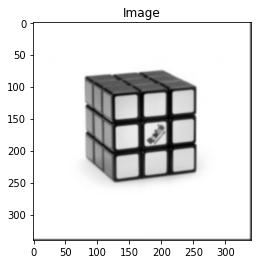

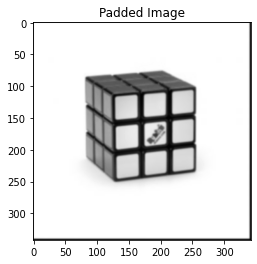

Output Image size : (340, 340)


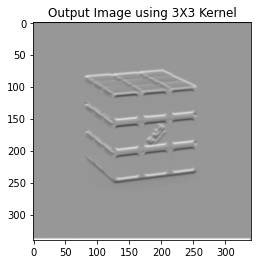

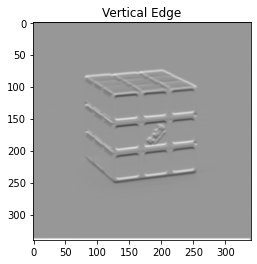

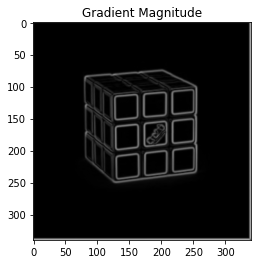

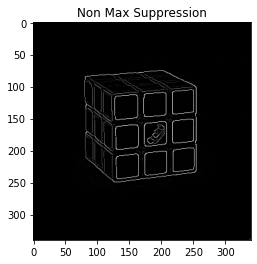

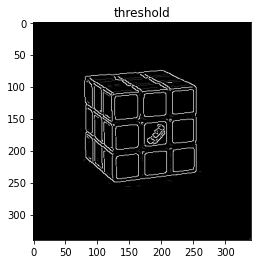

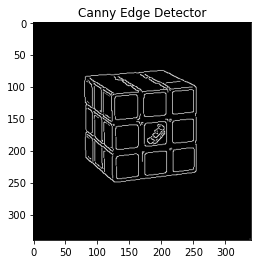

In [ ]:
import numpy as np
import cv2
import argparse

 
import matplotlib.pyplot as plt

def convolution(image, kernel, average=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

  
    plt.imshow(image, cmap='gray')
    plt.title("Image")
    plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    plt.imshow(padded_image, cmap='gray')
    plt.title("Padded Image")
    plt.show()

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

  
    plt.imshow(output, cmap='gray')
    plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
    plt.show()

    return output

def sobel_edge_detection(image, filter, convert_to_degree=False):
    new_image_x = convolution(image, filter)

    
    plt.imshow(new_image_x, cmap='gray')
    plt.title("Horizontal Edge")
    plt.show()

    new_image_y = convolution(image, np.flip(filter.T, axis=0))

    plt.imshow(new_image_y, cmap='gray')
    plt.title("Vertical Edge")
    plt.show()

    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))

    gradient_magnitude *= 255.0 / gradient_magnitude.max()


    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Gradient Magnitude")
    plt.show()

    gradient_direction = np.arctan2(new_image_y, new_image_x)

    if convert_to_degree:
        gradient_direction = np.rad2deg(gradient_direction)
        gradient_direction += 180

    return gradient_magnitude, gradient_direction



def non_max_suppression(gradient_magnitude, gradient_direction):
    image_row, image_col = gradient_magnitude.shape
 
    output = np.zeros(gradient_magnitude.shape)
 
    PI = 180
 
    for row in range(1, image_row - 1):
        for col in range(1, image_col - 1):
            direction = gradient_direction[row, col]
 
            if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
                before_pixel = gradient_magnitude[row, col - 1]
                after_pixel = gradient_magnitude[row, col + 1]
 
            elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
                before_pixel = gradient_magnitude[row + 1, col - 1]
                after_pixel = gradient_magnitude[row - 1, col + 1]
 
            elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
                before_pixel = gradient_magnitude[row - 1, col]
                after_pixel = gradient_magnitude[row + 1, col]
 
            else:
                before_pixel = gradient_magnitude[row - 1, col - 1]
                after_pixel = gradient_magnitude[row + 1, col + 1]
 
            if gradient_magnitude[row, col] >= before_pixel and gradient_magnitude[row, col] >= after_pixel:
                output[row, col] = gradient_magnitude[row, col]
 
    plt.imshow(output, cmap='gray')
    plt.title("Non Max Suppression")
    plt.show()
 
    return output
 
 
def threshold(image, low, high, weak):
    output = np.zeros(image.shape)
 
    strong = 255
 
    strong_row, strong_col = np.where(image >= high)
    weak_row, weak_col = np.where((image <= high) & (image >= low))
 
    output[strong_row, strong_col] = strong
    output[weak_row, weak_col] = weak
 
    plt.imshow(output, cmap='gray')
    plt.title("threshold")
    plt.show()
 
    return output
 
 
def hysteresis(image, weak):
    image_row, image_col = image.shape
 
    top_to_bottom = image.copy()
 
    for row in range(1, image_row):
        for col in range(1, image_col):
            if top_to_bottom[row, col] == weak:
                if top_to_bottom[row, col + 1] == 255 or top_to_bottom[row, col - 1] == 255 or top_to_bottom[row - 1, col] == 255 or top_to_bottom[
                    row + 1, col] == 255 or top_to_bottom[
                    row - 1, col - 1] == 255 or top_to_bottom[row + 1, col - 1] == 255 or top_to_bottom[row - 1, col + 1] == 255 or top_to_bottom[
                    row + 1, col + 1] == 255:
                    top_to_bottom[row, col] = 255
                else:
                    top_to_bottom[row, col] = 0
 
    bottom_to_top = image.copy()
 
    for row in range(image_row - 1, 0, -1):
        for col in range(image_col - 1, 0, -1):
            if bottom_to_top[row, col] == weak:
                if bottom_to_top[row, col + 1] == 255 or bottom_to_top[row, col - 1] == 255 or bottom_to_top[row - 1, col] == 255 or bottom_to_top[
                    row + 1, col] == 255 or bottom_to_top[
                    row - 1, col - 1] == 255 or bottom_to_top[row + 1, col - 1] == 255 or bottom_to_top[row - 1, col + 1] == 255 or bottom_to_top[
                    row + 1, col + 1] == 255:
                    bottom_to_top[row, col] = 255
                else:
                    bottom_to_top[row, col] = 0
 
    right_to_left = image.copy()
 
    for row in range(1, image_row):
        for col in range(image_col - 1, 0, -1):
            if right_to_left[row, col] == weak:
                if right_to_left[row, col + 1] == 255 or right_to_left[row, col - 1] == 255 or right_to_left[row - 1, col] == 255 or right_to_left[
                    row + 1, col] == 255 or right_to_left[
                    row - 1, col - 1] == 255 or right_to_left[row + 1, col - 1] == 255 or right_to_left[row - 1, col + 1] == 255 or right_to_left[
                    row + 1, col + 1] == 255:
                    right_to_left[row, col] = 255
                else:
                    right_to_left[row, col] = 0
 
    left_to_right = image.copy()
 
    for row in range(image_row - 1, 0, -1):
        for col in range(1, image_col):
            if left_to_right[row, col] == weak:
                if left_to_right[row, col + 1] == 255 or left_to_right[row, col - 1] == 255 or left_to_right[row - 1, col] == 255 or left_to_right[
                    row + 1, col] == 255 or left_to_right[
                    row - 1, col - 1] == 255 or left_to_right[row + 1, col - 1] == 255 or left_to_right[row - 1, col + 1] == 255 or left_to_right[
                    row + 1, col + 1] == 255:
                    left_to_right[row, col] = 255
                else:
                    left_to_right[row, col] = 0
 
    final_image = top_to_bottom + bottom_to_top + right_to_left + left_to_right
 
    final_image[final_image > 255] = 255
 
    return final_image
 
 
if __name__ == '__main__':
 
    image = cv2.imread("edge-detection2.jpg")
 
    # blurred_image = gaussian_blur(image, kernel_size=9, verbose=False)
    kernel_box = np.array([[(1/273),(4/273),(7/273),(4/273),(1/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(7/273),(26/273),(41/273),(26/273),(7/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(1/273),(4/273),(7/273),(4/273),(1/273)]])
    blurred_image = applyKernel(kernel_box,image)
 
    edge_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
 
    gradient_magnitude, gradient_direction = sobel_edge_detection(blurred_image, edge_filter, convert_to_degree=True)
 
    new_image = non_max_suppression(gradient_magnitude, gradient_direction)
 
    weak = 50
 
    new_image = threshold(new_image, 5, 20, weak=weak)
 
    new_image = hysteresis(new_image, weak)
 
    plt.imshow(new_image, cmap='gray')
    plt.title("Canny Edge Detector")
    plt.show()